<a href="https://colab.research.google.com/github/Aman7Rathore/Credit_card_default_predictio-/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/capstone_project-3/default of credit card clients.csv",index_col=0)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df = df.iloc[1:,:]

**We can remove some features to reduce noise in dataset
(Sex,Education and marriage of a person are not so important features to calculate credit card default of a person)**

In [6]:
df.drop(['X2','X3','X4'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X5      30000 non-null  object
 2   X6      30000 non-null  object
 3   X7      30000 non-null  object
 4   X8      30000 non-null  object
 5   X9      30000 non-null  object
 6   X10     30000 non-null  object
 7   X11     30000 non-null  object
 8   X12     30000 non-null  object
 9   X13     30000 non-null  object
 10  X14     30000 non-null  object
 11  X15     30000 non-null  object
 12  X16     30000 non-null  object
 13  X17     30000 non-null  object
 14  X18     30000 non-null  object
 15  X19     30000 non-null  object
 16  X20     30000 non-null  object
 17  X21     30000 non-null  object
 18  X22     30000 non-null  object
 19  X23     30000 non-null  object
 20  Y       30000 non-null  object
dtypes: object(21)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum()

X1     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**SINCE WE HAVE NO NULL VALUES IN THE DATASET WE WILL DIRECTLY CONVERT THE DATATYPE TO 'int' AND MOVE FORWARD**

In [9]:
df = df.astype(str).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X5      30000 non-null  int64
 2   X6      30000 non-null  int64
 3   X7      30000 non-null  int64
 4   X8      30000 non-null  int64
 5   X9      30000 non-null  int64
 6   X10     30000 non-null  int64
 7   X11     30000 non-null  int64
 8   X12     30000 non-null  int64
 9   X13     30000 non-null  int64
 10  X14     30000 non-null  int64
 11  X15     30000 non-null  int64
 12  X16     30000 non-null  int64
 13  X17     30000 non-null  int64
 14  X18     30000 non-null  int64
 15  X19     30000 non-null  int64
 16  X20     30000 non-null  int64
 17  X21     30000 non-null  int64
 18  X22     30000 non-null  int64
 19  X23     30000 non-null  int64
 20  Y       30000 non-null  int64
dtypes: int64(21)
memory usage: 5.0+ MB


In [11]:
df.shape

(30000, 21)

**Now we will Perform EDA**


In [12]:
pip install dataprep

     |████████████████████████████████| 9.5 MB 3.8 MB/s 
     |████████████████████████████████| 133 kB 47.7 MB/s 
     |████████████████████████████████| 943 kB 43.0 MB/s 
     |████████████████████████████████| 965 kB 33.1 MB/s 
     |████████████████████████████████| 1.0 MB 20.1 MB/s 
     |████████████████████████████████| 1.1 MB 45.5 MB/s 
     |████████████████████████████████| 95 kB 4.3 MB/s 
     |████████████████████████████████| 10.9 MB 32.7 MB/s 
     |████████████████████████████████| 366 kB 52.4 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 749 kB 48.6 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 1.5 MB 34.4 MB/s 
     |████████████████████████████████| 144 kB 51.2 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |██████

In [13]:
from dataprep.eda import create_report

DataPrep Report
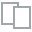
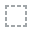
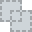
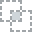
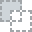
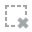
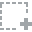
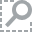
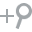
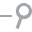
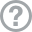
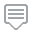
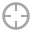
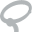
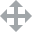
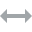
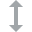
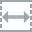
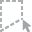
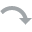
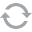
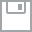
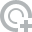
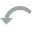
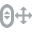
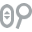
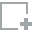
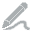
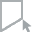
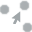
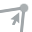
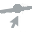

In [14]:
create_report(df)

In [15]:
df['X5'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: X5, dtype: int64

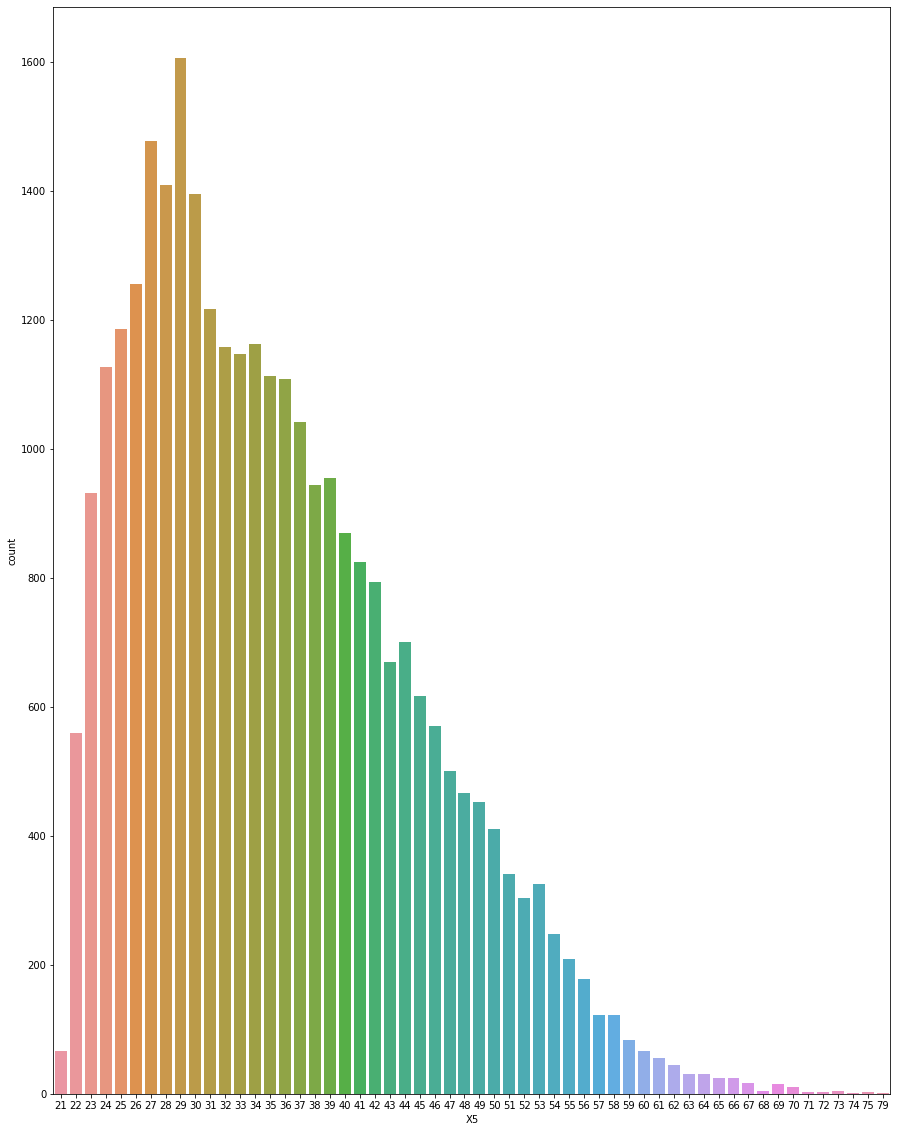

In [16]:
plt.figure(figsize=(15,20))
sns.countplot(x = 'X5',data = df)
plt.show()

**This shows the maximum number of defaulters are from age catagory of 29 to 37 years**

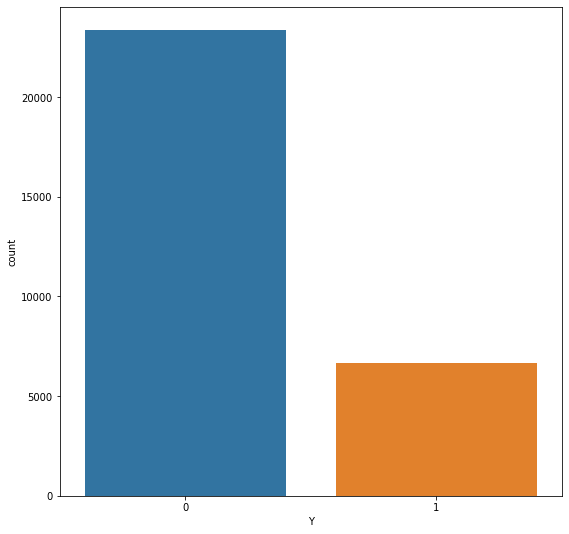

In [17]:
plt.figure(figsize=(9,9))
sns.countplot(x='Y',data=df)
plt.show()

In [18]:
df['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

**This shows data is imbalanced and needs to be treated , Here the data is not so much so we can use oversampling technique i.e duplicating the datapoints of minority class**

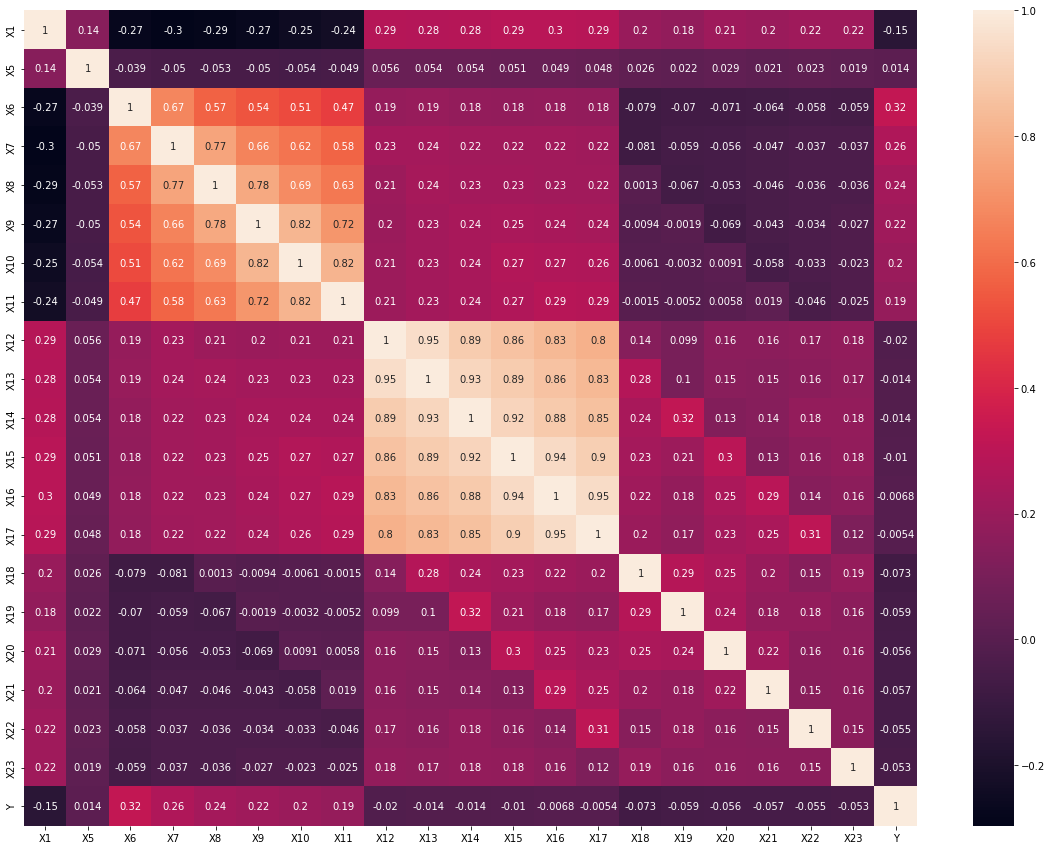

In [19]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
y = df['Y']

In [21]:
x = df.drop('Y',axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_res,Y_res = smt.fit_resample(X_train,Y_train)

In [24]:
Y_res.value_counts()

0    18677
1    18677
Name: Y, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
ms = StandardScaler()
ms.fit_transform(X_res,Y_res)

array([[-0.58627894, -1.29787279, -0.15490382, ..., -0.20730644,
        -0.19289842, -0.22864893],
       [-0.98433393, -0.84473835, -0.15490382, ..., -0.22593284,
        -0.29652026, -0.28640591],
       [ 0.20983104,  0.9677994 , -0.15490382, ...,  0.19376334,
         0.44496751, -0.27443351],
       ...,
       [ 1.24477402, -0.1650367 , -1.03870972, ..., -0.22720766,
        -0.27178009, -0.19141607],
       [-0.98433393, -1.52444001, -0.15490382, ..., -0.28967341,
        -0.28605051, -0.28640591],
       [-0.82511194, -0.50488753,  1.61270799, ..., -0.22763259,
        -0.14377665, -0.25371204]])

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res,Y_res)

LogisticRegression(max_iter=1000)

In [27]:
y_pre = lr.predict(X_test)

In [28]:
y_pre

array([1, 0, 1, ..., 1, 1, 0])

In [29]:
Y_test

2309     0
22405    0
23398    0
25059    0
2665     1
        ..
2211     0
14145    1
23109    0
25704    0
29172    0
Name: Y, Length: 6000, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pre,Y_test)

array([[2426,  354],
       [2261,  959]])

In [31]:
classification_report(Y_test,y_pre)

'              precision    recall  f1-score   support\n\n           0       0.87      0.52      0.65      4687\n           1       0.30      0.73      0.42      1313\n\n    accuracy                           0.56      6000\n   macro avg       0.59      0.62      0.54      6000\nweighted avg       0.75      0.56      0.60      6000\n'

In [32]:
lr.score(X_test,Y_test)

0.5641666666666667

In [65]:
roc_auc_score(Y_test,y_pre)

0.6239951504956669

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


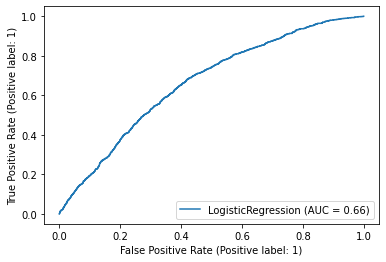

In [66]:
metrics.plot_roc_curve(lr,X_test,Y_test)

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_res,Y_res)

SVC()

In [34]:
Y__pre = svc.predict(X_test)

In [35]:
confusion_matrix(Y__pre,Y_test)

array([[2564,  394],
       [2123,  919]])

In [36]:
svc.score(X_test,Y_test)

0.5805

In [67]:
roc_auc_score(Y_test,Y__pre)

0.6234844283364838

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


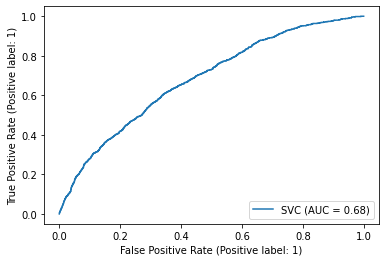

In [68]:
metrics.plot_roc_curve(svc,X_test,Y_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_res,Y_res)

RandomForestClassifier()

In [38]:
y__pre = rfc.predict(X_test)

In [39]:
rfc.score(X_res,Y_res)


0.997590619478503

In [40]:
rfc.score(X_test,Y_test)


0.7901666666666667

In [41]:
classification_report(Y_test,y__pre)

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87      4687\n           1       0.52      0.47      0.49      1313\n\n    accuracy                           0.79      6000\n   macro avg       0.69      0.67      0.68      6000\nweighted avg       0.78      0.79      0.79      6000\n'

In [60]:
roc_auc_score(Y_test,y__pre)

0.6748983714901663

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


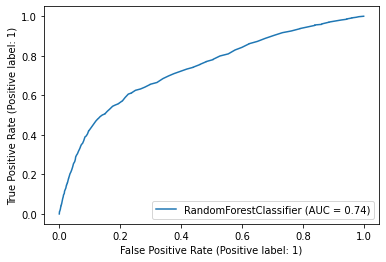

In [62]:
metrics.plot_roc_curve(rfc,X_test,Y_test)

**Training data has accuracy of 99% but testing data accuracy is reduced to 80% that shows clear case of OVERFITTING**

In [42]:
import xgboost

In [43]:
from xgboost import XGBClassifier
model_1 = XGBClassifier()
model_1.fit(X_res,Y_res)


XGBClassifier()

In [44]:
y_predict = model_1.predict(X_test)

In [45]:
model_1.score(X_res,Y_res)

0.7737056272420624

In [46]:
model_1.score(X_test,Y_test)

0.7618333333333334

In [47]:
confusion_matrix(y_predict,Y_test)

array([[3807,  549],
       [ 880,  764]])

In [48]:
classification_report(Y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.87      0.81      0.84      4687\n           1       0.46      0.58      0.52      1313\n\n    accuracy                           0.76      6000\n   macro avg       0.67      0.70      0.68      6000\nweighted avg       0.78      0.76      0.77      6000\n'

In [54]:
y_pred_proba = model_1.predict_proba(X_test)[::,1]


In [57]:
auc_score = roc_auc_score(Y_test,y_predict)
print(auc_score)

0.6970601058070718


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


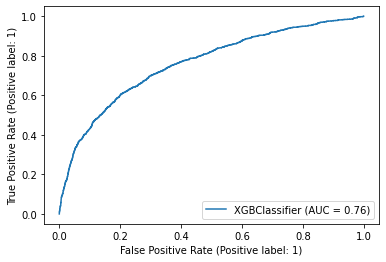

In [64]:
metrics.plot_roc_curve(model_1, X_test, Y_test) 


#**Finally Our model after Xgboost gives a decent prediction with an accuracy of 76%**#



